<a href="https://colab.research.google.com/github/Ehizson/HDSC-W2023-ExtraProjects/blob/main/Appliances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appliances Energy Prediction Model**

**Objective**

The aim of the dataset is to find the best regression model that can be used to predict the use of appliances energy in a low energy building.

In [7]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [8]:
#loading dataset

E_data = pd.read_csv('/content/KAG_energydata_complete.csv')
warnings.filterwarnings('ignore')

### **Data Inspection**

In [9]:
E_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
E_data.shape

(19735, 29)

In [11]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [12]:
E_data.duplicated().any()

False

In [13]:
E_data.isna().sum().sum()

0

In [14]:
E_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


**Variables Description**

Appliances : It is our target variable ranging from 10 to 1080.Had some rare peak values.

lights : It has mostly zero values and it has some outliers.

(All the temperature measures here are measured in Celsius)

T1(Temperature in Kitchen Area) : These temperature looks descent without any outliers and seems like the data doesn't have cold climate in any temperature features becuase the min value is more than 0 for all the features.

T2(Temperature in Living Room) : These temperature looks descent without any outliers.

RH1 to RH2 (Room Humidity): It is the measure of humidity in different rooms in the house.

Windspeed : This Windspeed has some outliers.

From Chievers weather station we have some weather date like Hg RHout, Visibility, Tdewpoint etc.

### **Data Transformation**

In [15]:
print(E_data.columns)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [16]:
#checking unique values of our target variable

E_data['Appliances'].nunique()

92

In [17]:
df_copy = E_data.copy()

In [18]:
print(df_copy.columns)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [19]:
df_copy.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [20]:
#changing date column dtype as datetime type
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [21]:
# Convert datetime64 column to float64 using Unix timestamp
df_copy['date'] = df_copy['date'].astype(int) / 1e9

# Print the dtypes of each column
print(df_copy.dtypes)

date           float64
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


### **Exploratory Data Analysis**

In [22]:
#splitting the data into training sets

from sklearn.model_selection import train_test_split
y = df_copy['Appliances']
df_copy.drop('Appliances',inplace= True,axis=1) 
X = df_copy

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [23]:
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (13814, 28)
y_train :  (13814,)
X_test :  (5921, 28)
y_test :  (5921,)


### **ML Model**

In [24]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

#importing regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

In [25]:
#instantiate models

modelclasses = {'LinearR': LinearRegression(), 
                'SVR': SVR(), 
                'LassoR': Lasso(), 
                'RidgeR': Ridge(),
                'RandomForest': RandomForestRegressor()
                }

In [26]:
#Iteration of models

#create a list to store model results
rmse_scores = []
mse_scores = []
r2_scores = []

for model_name, model_method in modelclasses.items():
       
    #fit model to training data
    model_method.fit(X_train, y_train)
    
    #predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    #append RMSE evaluation metric for the model to the list 
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    #append MSE evaluation metric for the model to the list 
    mse_scores.append(metrics.mean_squared_error(y_test, y_pred))
    
    #append R2 score evaluation metric for the model to the list
    r2_scores.append(metrics.r2_score(y_test, y_pred))
    
#create a dataframe to store the results
reg_results = pd.DataFrame({"Model":modelclasses.keys(), "RMSE Score": rmse_scores, "MSE Score": mse_scores, "R2 Score": r2_scores})
reg_results

,Model,RMSE Score,MSE Score,R2 Score
0,LinearR,92.635513,8581.338246,0.167072
1,SVR,108.214795,11710.441789,-0.136647
2,LassoR,92.855605,8622.163305,0.163110
3,RidgeR,92.635596,8581.353670,0.167071
4,RandomForest,71.266157,5078.865166,0.507032


This shows that the RandomForestRegressor Model is more accurate than the other models with a r2 score of 0.51

<Axes: xlabel='R2 Score', ylabel='Model'>

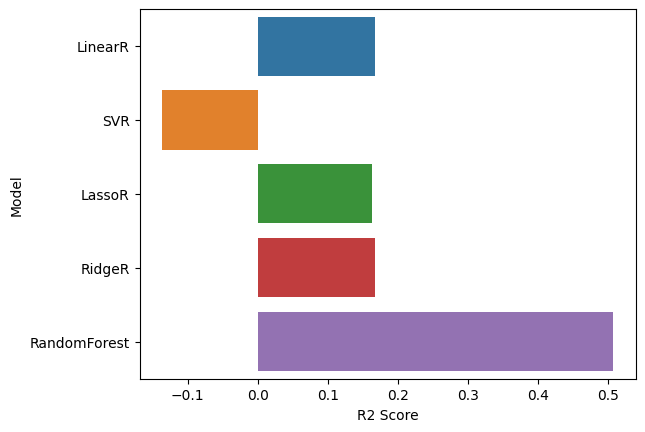

In [27]:
#plot the R2 Score

sns.barplot(x=reg_results['R2 Score'], y=reg_results.Model)

**Conclusion**

The RandomForestRegressor Model being the most accurate model here, should be used to predict the use of appliances energy in the low energy building.